# Вариант № 1
## Задание 1


Написать функцию, которая будет считать retention игроков

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import strftime
from datetime import datetime
import scipy
import statsmodels.api as sm
from tqdm.auto import tqdm
from scipy.stats import norm
from scipy.stats import shapiro

Загружаю данные о времени регистрации

In [2]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-salehi/shared/problem1-reg_data.csv',sep= ';')

In [4]:
df.head()

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5


'red_ts'- время регистрации

'uid'- уникальный номер пользователя




In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   reg_ts  1000000 non-null  int64
 1   uid     1000000 non-null  int64
dtypes: int64(2)
memory usage: 15.3 MB


In [26]:
df.shape

(1000000, 2)

Проверила, что пропусков в данных нет

In [21]:
df.isna().sum()


reg_ts    0
uid       0
dtype: int64

Загрузила данные о времени захода пользователей в игру

In [3]:

df_auth_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-salehi/shared/problem1-auth_data.csv',sep= ';')

In [37]:
df_auth_data.head()

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2


'auth_ts'- время захода пользователей в игру

'uid'- уникальный номер пользователя



In [9]:
df_auth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601013 entries, 0 to 9601012
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   auth_ts  int64
 1   uid      int64
dtypes: int64(2)
memory usage: 146.5 MB


In [35]:
df_auth_data.shape

(9601013, 2)

И тут без пропусков

In [28]:
df_auth_data.isna().sum()


auth_ts    0
uid        0
dtype: int64

Проверяю количество уникальных пользователей в обеих таблицах

In [4]:

df_auth_data['uid'].nunique()

1000000

In [34]:
df['uid'].nunique()

1000000

Преобразовываю unix на дату

In [5]:

df["date_of_reg"] = pd.to_datetime(df["reg_ts"], unit="s").dt.date

In [16]:
df.dtypes

reg_ts          int64
uid             int64
date_of_reg    object
dtype: object

Переведу дату в нужный тип данных

In [6]:

df["date_of_reg"]= pd.to_datetime(df["date_of_reg"])

In [18]:
df.dtypes

reg_ts                  int64
uid                     int64
date_of_reg    datetime64[ns]
dtype: object

Преобразовываю unix на дату

In [7]:

df_auth_data['date_of_auth']= pd.to_datetime(df_auth_data["auth_ts"], unit="s").dt.date

Переведу дату в нужный тип данных

In [8]:

df_auth_data['date_of_auth']= pd.to_datetime(df_auth_data['date_of_auth'])

In [20]:
df_auth_data.dtypes

auth_ts                  int64
uid                      int64
date_of_auth    datetime64[ns]
dtype: object

Данные подготовлены, считаю retention.

Для этого соединю таблицы в одну

In [9]:
df_retention = df_auth_data.merge(df, on='uid', how='left')

In [11]:
df_retention.head()

,auth_ts,uid,date_of_auth,reg_ts,date_of_reg
0,911382223,1,1998-11-18,911382223,1998-11-18
1,932683089,2,1999-07-22,932683089,1999-07-22
2,932921206,2,1999-07-25,932683089,1999-07-22
3,933393015,2,1999-07-31,932683089,1999-07-22
4,933875379,2,1999-08-05,932683089,1999-07-22


Проверю тип данных и количество строк

In [23]:

df_retention.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9601013 entries, 0 to 9601012
Data columns (total 5 columns):
 #   Column        Dtype         
---  ------        -----         
 0   auth_ts       int64         
 1   uid           int64         
 2   date_of_auth  datetime64[ns]
 3   reg_ts        int64         
 4   date_of_reg   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 439.5 MB


Пропусков нет

In [24]:
df_retention.isna().sum()


auth_ts         0
uid             0
date_of_auth    0
reg_ts          0
date_of_reg     0
dtype: int64

Определяю первую дату покупки

In [10]:

start_date = df_retention.groupby('uid')['date_of_reg'].min()
start_date = start_date.rename("start_day")
start_date.head()

uid
1   1998-11-18
2   1999-07-22
3   2000-01-13
4   2000-05-28
5   2000-09-16
Name: start_day, dtype: datetime64[ns]

In [11]:
df_retention = pd.merge(df_retention, start_date, left_on='uid', right_index=True)

Считаю сколько дней прошло с момента регистрации

In [12]:
df_retention['days_since_start'] = (df_retention['date_of_auth'] - df_retention['start_day']).dt.days
df_retention.head()

,auth_ts,uid,date_of_auth,reg_ts,date_of_reg,start_day,days_since_start
0,911382223,1,1998-11-18,911382223,1998-11-18,1998-11-18,0
1,932683089,2,1999-07-22,932683089,1999-07-22,1999-07-22,0
2,932921206,2,1999-07-25,932683089,1999-07-22,1999-07-22,3
3,933393015,2,1999-07-31,932683089,1999-07-22,1999-07-22,9
4,933875379,2,1999-08-05,932683089,1999-07-22,1999-07-22,14


Посмотрим 40 дневный daily retention 

In [13]:
f1 = df_retention['start_day'] < df_retention['date_of_auth'].max() - pd.Timedelta(days=40)
dff = df[f1]

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Все наши юзеры попали

In [14]:
len(dff)

1000000

In [15]:
df_retention[['uid', 'days_since_start']].head()

,uid,days_since_start
0,1,0
1,2,0
2,2,3
3,2,9
4,2,14


Чтобы узнать, сколько пользователей все еще были активны, скажем, через 40 дней, я собираюсь сгруппировать по дням с момента запуска, а затем подсчитать уникальных пользователей.

100% пользователей будут активны в первый день, но какая будет возвращаемость после первого дня, посмотрим

In [16]:
df_retention.groupby('days_since_start')['uid'].nunique().head()

days_since_start
0    1000000
1      20071
2      40997
3      46338
4      52258
Name: uid, dtype: int64

При этом мы подсчитали, что у нас 1000000 пользователей, и только 20071 были активны во второй день. Это означает, что 2% пользователей вернулись на второй день. Это, конечно, очень низкий показатель. 

Посмотрим тоже самое в долях

Видим очень низкий показатель возвращаемости

In [17]:
df_retention.groupby('days_since_start')['uid'].nunique().head() / df_retention['uid'].nunique()

days_since_start
0    1.000000
1    0.020071
2    0.040997
3    0.046338
4    0.052258
Name: uid, dtype: float64

Создам график для всей когорты

Отдельно отмечу retention на 28 день, так как на 28 день можно считать пользователя лояльным.

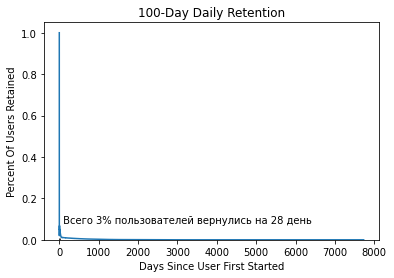

In [20]:
whole_retention = df_retention.groupby('days_since_start')['uid'].nunique() / df_retention['uid'].nunique()

plt.plot(whole_retention)
plt.title("100-Day Daily Retention")
plt.xlabel("Days Since User First Started")
plt.ylabel("Percent Of Users Retained")
plt.ylim(0,1.05)

plt.hlines(y=whole_retention.loc[28], xmin=0, xmax=28, linestyles='dotted')
plt.vlines(x=28, ymin=0, ymax=whole_retention.loc[28], linestyles='dotted')
plt.text(s=(" Всего {:.0%} пользователей вернулись на 28 день".format(whole_retention.loc[28])),
        x=20, y=whole_retention.loc[28] + .05);

Мы можем посмотреть на daily renetion по месяцам. Наш датасет включает себя слишком много месяцев, поэтому можем посмотреть за последний представленный год - 2020

In [21]:
df_retention['start_month'] = df_retention['start_day'].values.astype('datetime64[M]')

In [22]:
df_retention = df_retention.query('start_month>="2020-01-01"')

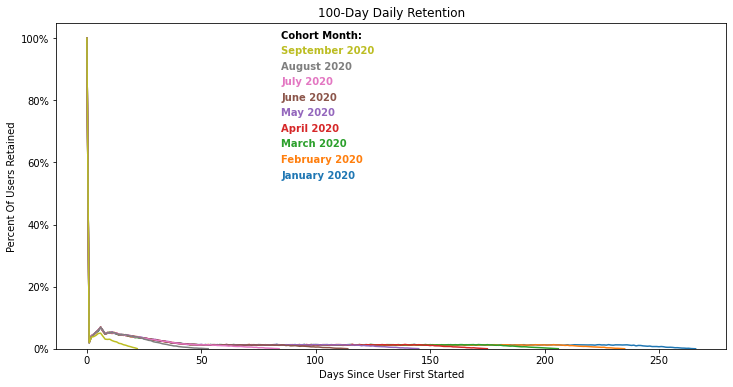

In [23]:
plt.figure(figsize=(12,6))
legend_x = 85
legend_y = .55

# функция для кажого месяца
for i, month in enumerate(df_retention['start_month'].unique()):
    
    # для каждого месяца когорта
    dfc = df_retention[df_retention['start_month']==pd.to_datetime(month)]

    # retention для начала месяца
    retention_cohort = dfc.groupby('days_since_start')['uid'].nunique() / dfc['uid'].nunique()
    
    
    p = plt.plot(retention_cohort)
    
   
    plt.text(s=pd.to_datetime(month).strftime('%B %Y'), c=p[0].get_color(),
             x=legend_x, y=legend_y + (.05 * i), weight='bold')

plt.text(s="Cohort Month:", x=legend_x, y=legend_y + (.05 * i) + .05, weight='bold')
plt.title("100-Day Daily Retention")
plt.xlabel("Days Since User First Started")
plt.ylabel("Percent Of Users Retained")
plt.ylim(0,1.05)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]);

В среднем, хорошими значениями считаются следующие:

D1 Retention: 40%

D7 Retention: 20%

D28 Retention: 10%

Наш показатель возвращаемости очень низкий и не дотягивает до средних нужных показателей. Чтобы игра была успешной, очень важно удерживать пользователя вовлеченным в игру. Нужно посмотреть на разные метрики, в какой момент отваливаются пользователи и понять почему. 

Получив такой результат, необходимо провести более глубокий анализ, чтобы выявить возможные причины невовлеченности пользователей в игру.

## Задание 2

Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.

Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?

Итак, у нас есть нулевая гипотеза: Разницы между показателем ARPU в тестовой и контрольной группе нет

И альтернативная гипотеза: Разница между показателем ARPU в тестовой и контрольной группе есть

ARPU - средний доход на пользователя 

In [19]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-salehi/Финальный/Проект_1_Задание_2.csv', sep = ';')

In [5]:
df

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b
...,...,...,...
404765,404766,0,a
404766,404767,0,b
404767,404768,231,a
404768,404769,0,a


In [6]:
group_a = df.query('testgroup == "a"')
group_b = df.query('testgroup == "b"')

In [8]:
# ARPU 
ARPU_a = group_a.revenue.sum()/group_a.testgroup.count()
ARPU_b = group_b.revenue.sum()/group_a.testgroup.count()
Diff   = abs(ARPU_b/ARPU_a-1)*100


print(f'ARPU для группы А: {ARPU_a}')
print(f'ARPU для группы B: {ARPU_b}')
print(f'Разница между метриками: {round(Diff, 2)} %' )

ARPU для группы А: 25.413719736965806
ARPU для группы B: 26.825940238393294
Разница между метриками: 5.56 %


In [9]:
# ARPPU 
ARPPU_a = group_a.query('revenue != 0').revenue.sum()/group_a.query('revenue != 0').testgroup.count()
ARPPU_b = group_b.query('revenue != 0').revenue.sum()/group_b.query('revenue != 0').testgroup.count()
Diff    = abs(ARPPU_b/ARPPU_a-1)*100


print(f'ARPPU для группы А: {ARPPU_a}')
print(f'ARPPU для группы B: {ARPPU_b}')
print(f'Разница между метриками: {round(Diff, 2)} %' )

ARPPU для группы А: 2663.9984439834025
ARPPU для группы B: 3003.6581717451522
Разница между метриками: 12.75 %


In [10]:
# Конверсия в оплату
Conv_a = group_a.query('revenue != 0').testgroup.count()/group_a.testgroup.count()*100
Conv_b = group_b.query('revenue != 0').testgroup.count()/group_b.testgroup.count()*100
Diff    = abs(Conv_a/Conv_b-1)*100


print(f'Конверсия в оплату для группы А: {round(Conv_a, 2) } %')
print(f'Конверсия в оплату для группы B: {round(Conv_b, 2)} %')
print(f'Разница между метриками: {round(Diff, 2)} %' )


Конверсия в оплату для группы А: 0.95 %
Конверсия в оплату для группы B: 0.89 %
Разница между метриками: 7.11 %


Предварительные результаты:

Тестовая группа: Группа Б

Контрольная группа: Группа А

Конверсия: Группа А (0.95%) > Группа B (0.89%) **7.11 % разницы**

ARPPU: Группа В (3004) > Группа А (2664) **12.75 % разницы**

ARPU: Группа В (26.8) > Группа А (25.4) **5.56 % разницы**

Необходимо выяснить случайные ли это величины или значимые

Для начала проверю нет ли выбросов

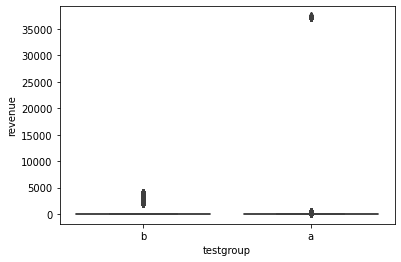

In [18]:

sns.boxplot(x = "testgroup", y = "revenue", data = data)

Контрольная выборка имеет большие выбросы.

Было бы интересно узнать какая часть дохода благодаря выбросам 

И какая часть людей отвечают за эти выбросы 


In [20]:
out_portion = group_a.query('revenue > 15000').revenue.sum() / group_a.revenue.sum()
print(f'"Выбросы" принесли {round(out_portion*100,2)} % прибыли в контрольной группе')

out_portion_ppl = group_a.query('revenue > 15000').revenue.count() / group_a.query('revenue > 0').revenue.count()
print(f'За "Выбросы" ответственны {round(out_portion_ppl*100,2)} % покупателей в контрольной группе')

"Выбросы" принесли 89.37 % прибыли в контрольной группе
За "Выбросы" ответственны 6.38 % покупателей в контрольной группе


Если отрезать выбросы у нас будет разница ARPU в ~800% между группами, соотвественно такое решение будет не корректным

**Проверяем статистическую значимость различий метрики ARPU**

Первым делом нам нужно узнать природу распределения, чтобы выбрать подходящий метод оценки

Для этого подойдут тесты Колмогорова смирнова или Шапиро-Уилка

Нулевая гипотеза: распределения нормальные 

In [35]:
a_norm = shapiro(group_a.revenue.sample(1500))
b_norm = shapiro(group_b.revenue.sample(1500))

print(f'p-value для данных в контрольной: {a_norm[1]}')
print(f'p-value для данных в тестовой: {b_norm[1]}')

p-value для данных в контрольной: 0.0
p-value для данных в тестовой: 0.0


Данные распределены ненормально, а значит параметрические предположения не удовлетворены, соотвественно t-test отвергается

Нам подойдет метод boostrap

In [25]:
test_value = df.query("testgroup == 'b'")['revenue']
control_value = df.query("testgroup == 'a'")['revenue']

In [26]:
def get_bootstrap(
    test_value, # числовые значения первой выборки
    control_value, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = test_value.sample(
            len(test_value), 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = control_value.sample(
            len(control_value), 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1)-statistic(samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

In [27]:
np.random.seed(5)

In [28]:
n = 1000

sample_1 = np.random.exponential(scale=1/0.001, size=n)
sample_2 = np.random.exponential(scale=1/0.001, size=n)

df_1 = pd.DataFrame({
    "sample_1": sample_1,
    "sample_2": sample_2
})

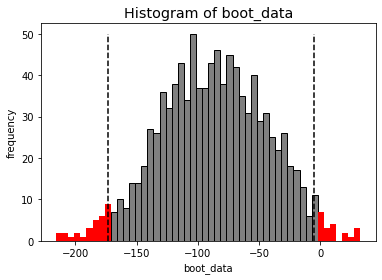

In [29]:
booted_data = get_bootstrap(df_1.sample_1, df_1.sample_2) # в результате хранится разница двух распределений, ДИ и pvalue

In [30]:
booted_data["p_value"] # альфа

0.04564731158962379

In [31]:
booted_data["quants"] # ДИ не попал в 0, значит тут нулевая гипотеза отклоняется.

,0
0.025,-173.270058
0.975,-4.865217


Итого, с высокой долей вероятности мы можем утверждать, что различия в метрике ARPU случайны



**Проверяем статистическую значимость различий метрики ARPPU**

In [36]:
a_norm = shapiro(group_a.query('revenue > 0').revenue.sample(1500))
b_norm = shapiro(group_b.query('revenue > 0').revenue.sample(1500))

print(f'p-value для данных в контрольной: {a_norm[1]}')
print(f'p-value для данных в тестовой: {b_norm[1]}')

p-value для данных в контрольной: 0.0
p-value для данных в тестовой: 6.234170278921636e-21


Среди платящих пользователей, данные так же распределены ненормально

Обратимся к bootstrap

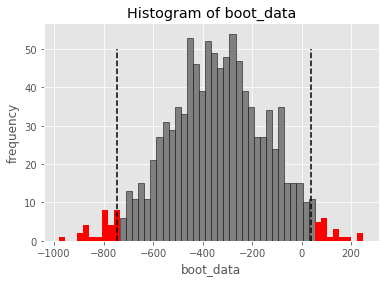

In [38]:
data = get_bootstrap(group_a.query('revenue > 0').revenue, group_b.query('revenue > 0').revenue, 1000, np.mean)

In [39]:
data["p_value"]

0.0882263140936874

In [41]:
data["quants"]

,0
0.025,-747.179796
0.975,38.517806


ДИ попал в 0, значит тут нулевая принимается.

**Проверка на статистическую значимость конверсий двух версий**

In [42]:
print(f'Конверсия в оплату для группы А: {round(Conv_a, 2) } %')
print(f'Конверсия в оплату для группы B: {round(Conv_b, 2)} %')
print(f'Разница между метриками: {round(Diff, 2)} %' )

Конверсия в оплату для группы А: 0.95 %
Конверсия в оплату для группы B: 0.89 %
Разница между метриками: 7.11 %


In [43]:
#объявляю функуцию сравнения конверсий
def conversion_significance(sample1, converted1, sample2, converted2, confidence=95):
    conv1 = converted1/sample1 
    conv2 = converted2/sample2
    
    if confidence == 95:
        cf = 1.95996
    elif confidence == 90:
        cf = 1.64485
    elif confidence == 99:
        cf = 2.57583
    else: 
        cf = 0
        print('Wrong confidence query. Correct and re-run function')    
    if cf != 0: 
        low = conv2-conv1-cf*np.sqrt(conv1*(1-conv1)/sample1 + conv2*(1-conv2)/sample2)
        high = conv2-conv1+cf*np.sqrt(conv1*(1-conv1)/sample1 + conv2*(1-conv2)/sample2)
        
        if low < 0 < high: 
            print('Конверсии статистически не различимы')
        elif (low<0 and high<0) or (low>0 and high>0):
            print('Разница конверсий статистически значима')


In [44]:
conversion_significance(202103, 1928, 202667, 1805, 95)

Разница конверсий статистически значима


**ВЫВОД:**

-Мы выяснили, что ARPU и ARPPU в тестовой группе выше чем в контрольной на 5% и 12% соотвественно. Однако, 
согласно статистическому анализу мы с высокой долей вероятности можем сказать что различия в этих метриках случайны. 


-6% платящих пользователей котрольной группы ответственны за 85% общего дохода. 

-У контрольной группы конверсия в покупку лучше. 

**Отвечая на вопрос бизнеса:**
"Какой набор предложений можно считать лучшим?", нам нужно провести доп исследования, перед тем, как запускать обновления. Необходимо выяснить аномальные ли выбросы, почему 6% контрольной группы потратили так много? Если убрать эти выбросы, то разница будет огромной. Поэтому на данном этапе мы не внедряем набор новых предложений



## Задание 3

В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. Для получения награды требуется пройти ряд уровней за определенное время. С помощью каких метрик можно оценить результаты последнего прошедшего события?


- сколько человек и как долго играют данный ивент
- получив какой предмет пользователи перестают играть
- на каком уровне сколько игроков отсеивается из за сложности
- сколько времени в среднем игроки тратят на каждом уровне
- если у нас gacha то смотрим на награды и покупки облегчающих жизнь фич, т.е
среднее количество наград , средний доход с одного пользователя и ARPU с разбивкой на уровни, чтобы посмотреть на каком уровне пользователи платят больше всего
- для общей оценки успешности ивента, можем также посмотреть на продолжительность сессий и сравнить с периодом без ивента.


Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?

- набор метрик останется тем же, но мы добавим также метрику, отслеживающую влияние отката на вовлеченность пользователя. Вычленим тех пользователей, что откатились и посмотрим не отсеиваются ли они после отката. Сравним с теми игроками, которые не откатывались. 
- также проверим на каком уровне происходит наибольший откат.